In [1]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# 데이터를 로드해서 df 라는 변수에 담습니다.

df = pd.read_csv("../../전국도시공원표준데이터.csv", encoding="cp949")
df.shape

(18137, 20)

In [78]:
data_types=df.dtypes

In [79]:
data_types[:5]

관리번호        object
공원명         object
공원구분        object
소재지도로명주소    object
소재지지번주소     object
dtype: object

In [83]:
data_types[data_types==object]

관리번호            object
공원명             object
공원구분            object
소재지도로명주소        object
소재지지번주소         object
공원보유시설(운동시설)    object
공원보유시설(유희시설)    object
공원보유시설(편익시설)    object
공원보유시설(교양시설)    object
공원보유시설(기타시설)    object
관리기관명           object
전화번호            object
데이터기준일자         object
제공기관코드          object
제공기관명           object
시도              object
구군              object
편익시설            object
전화번호(전처리)       object
dtype: object

In [86]:
df_fac=df[df['공원보유시설(편익시설)'].notnull()]

In [90]:
facilities=['화장실', '주차장', '음수대', '파고라', '정자', '벤치', '의자', '놀이터', '축구장', '야영장', 'CCTV']

In [91]:
for i in facilities:
    df[i]=df['공원보유시설(편익시설)'].str.contains(i)

In [94]:
df[facilities].sum()

화장실     2208
주차장      611
음수대      493
파고라     1032
정자       648
벤치       850
의자       949
놀이터       21
축구장        6
야영장        3
CCTV       6
dtype: object

In [95]:
df_fac=df[df['공원보유시설(편익시설)'].notnull()]

In [96]:
data_types=df.dtypes

In [99]:
var_numbers=data_types[data_types!=object]

In [102]:
var_numbers.index.tolist()

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

array([[<AxesSubplot:title={'center':'위도'}>,
        <AxesSubplot:title={'center':'경도'}>],
       [<AxesSubplot:title={'center':'공원면적'}>,
        <AxesSubplot:title={'center':'지정고시일'}>],
       [<AxesSubplot:title={'center':'고시연도'}>,
        <AxesSubplot:title={'center':'고시월'}>]], dtype=object)

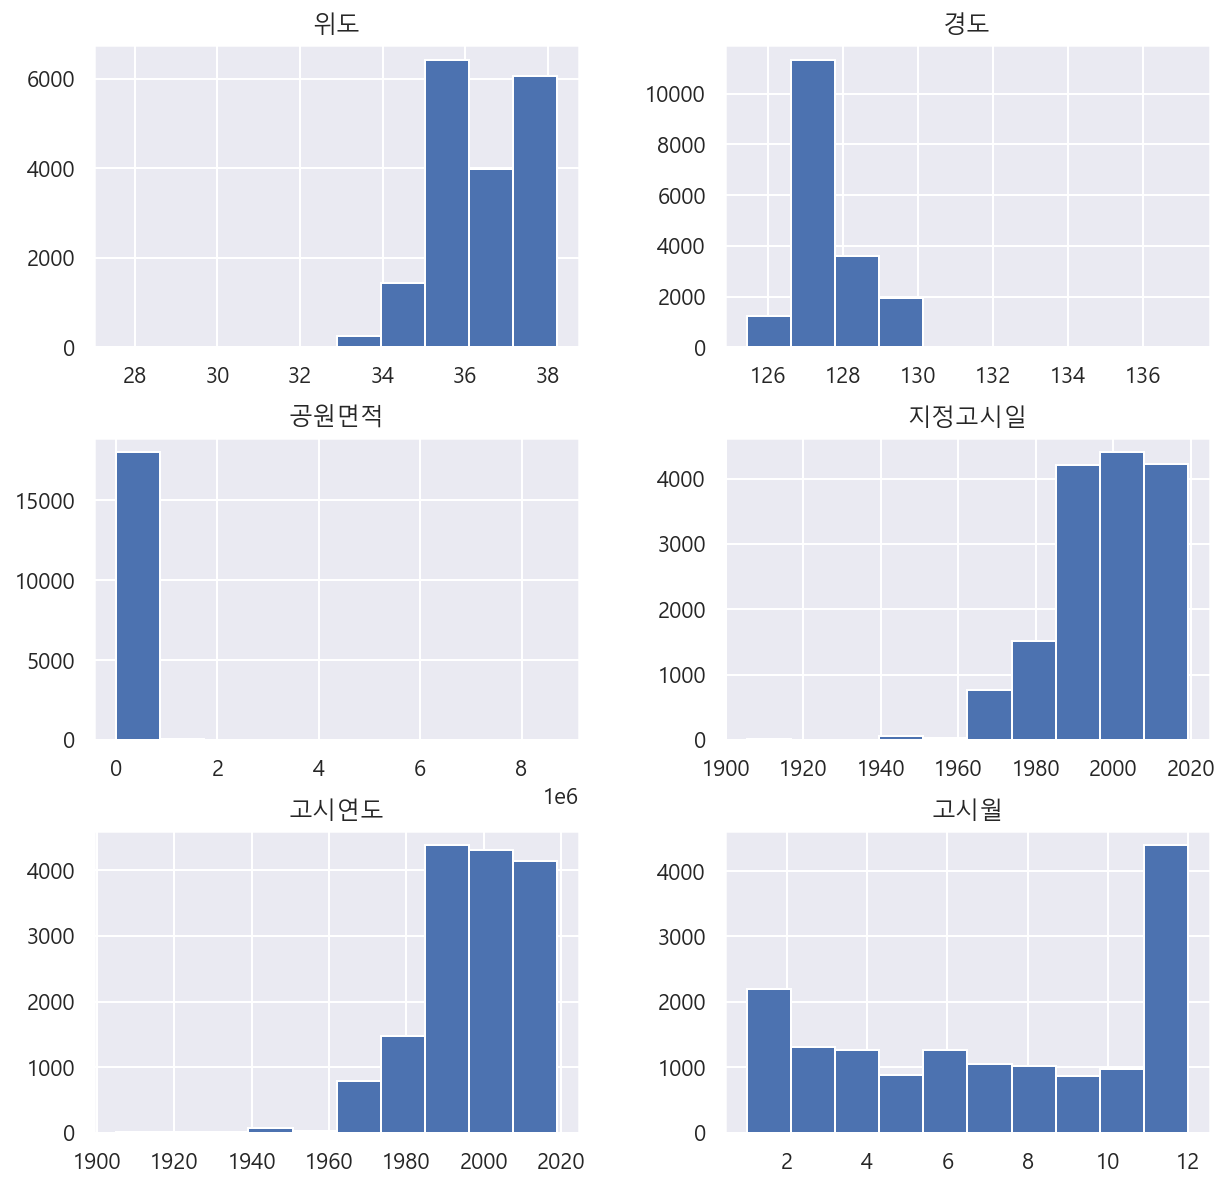

In [106]:
plt.rc('font',family='Malgun Gothic' )
df.hist(figsize=(10, 10))

In [107]:
df.describe()

,위도,경도,공원면적,고시연도,고시월
count,18137.000000,18137.000000,1.813700e+04,15225.000000,15225.000000
mean,36.335922,127.543937,3.781196e+04,1997.238555,7.097274
std,1.051835,0.892670,2.203052e+05,13.592078,3.753724
min,27.551606,125.430955,0.000000e+00,1905.000000,1.000000
25%,35.275430,126.872301,1.503000e+03,1989.000000,4.000000
50%,36.364729,127.130926,2.159000e+03,2000.000000,7.000000
75%,37.404278,128.466193,1.025460e+04,2008.000000,11.000000
max,38.224926,137.202661,8.703000e+06,2019.000000,12.000000


In [111]:
var_objects=data_types[data_types==object]

In [113]:
var_objects=var_objects.index.tolist()
var_objects[-5:]

['의자', '놀이터', '축구장', '야영장', 'CCTV']

In [114]:
df[var_objects].describe()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,편익시설,전화번호(전처리),화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV
count,18137,18137,18137,18137,17158,4845,6964,5084,1160,3116,17383,16957,18137,18137,18137,18137,18137,5084,16957,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084
unique,14710,12423,10,15186,14419,1485,1237,1102,378,993,279,497,112,219,219,17,232,730,395,2,2,2,2,2,2,2,2,2,2,2
top,31110-60001,공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,전라남도 무안군 삼향읍 남악리 미지정 간척지,운동기구,조합놀이대,화장실,-,-,경상남도 창원시청,055-212-4501,2019-09-24,5670000,경상남도 창원시,경기도,창원시,화장실,055-***-**01,False,False,False,False,False,False,False,False,False,False,False
freq,124,145,9987,18,18,360,1526,1037,250,141,1176,344,1344,1176,1176,3318,1176,1086,696,2876,4473,4591,4052,4436,4234,4135,5063,5078,5081,5078


In [115]:
df.describe(include='object')

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,편익시설,전화번호(전처리),화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV
count,18137,18137,18137,18137,17158,4845,6964,5084,1160,3116,17383,16957,18137,18137,18137,18137,18137,5084,16957,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084
unique,14710,12423,10,15186,14419,1485,1237,1102,378,993,279,497,112,219,219,17,232,730,395,2,2,2,2,2,2,2,2,2,2,2
top,31110-60001,공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,전라남도 무안군 삼향읍 남악리 미지정 간척지,운동기구,조합놀이대,화장실,-,-,경상남도 창원시청,055-212-4501,2019-09-24,5670000,경상남도 창원시,경기도,창원시,화장실,055-***-**01,False,False,False,False,False,False,False,False,False,False,False
freq,124,145,9987,18,18,360,1526,1037,250,141,1176,344,1344,1176,1176,3318,1176,1086,696,2876,4473,4591,4052,4436,4234,4135,5063,5078,5081,5078


In [137]:
manage_category=pd.crosstab(index=df['관리기관명'], columns=df['공원구분'])

In [142]:
city_category=pd.crosstab(index=df['시도'], columns=df['공원구분'])

In [144]:
city_category.style.background_gradient()

공원구분,근린공원,기타,도시농업공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
시도,,,,,,,,,,
강원도,141,0,2,1,8,85,10,391,4,6
경기도,806,17,1,8,91,406,61,1821,34,73
경상남도,390,0,3,8,25,178,17,1161,12,31
경상북도,178,3,0,0,18,100,26,575,11,6
광주광역시,97,0,0,0,0,18,5,305,1,3
대구광역시,125,0,0,0,5,57,6,381,2,10
대전광역시,99,1,0,1,12,47,12,315,1,9
부산광역시,144,16,1,2,14,96,9,365,3,3
서울특별시,332,70,4,1,19,183,4,1117,11,4
